In [1]:
import datetime as dt
from datetime import datetime
import pandas as pd
import plotly.express as px
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader  import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import os
import yfinance as yf
import plotly.graph_objects as go
import numpy as np

In [2]:
datafile = "research_dataset/archive/"

all_subreddit = os.listdir(datafile)

In [3]:
wsb = "wallstreetbets/"
dataset_name = "submissions_reddit.csv"
df = pd.read_csv(datafile + wsb + dataset_name)

In [4]:
for col in df:
    unique = (df[col].unique())
    print(col)
    print(len(unique))
    print(unique[:5])

id
775326
['ko124i' 'ko12uq' 'ko13df' 'ko17yf' 'ko1a4i']
author
373850
['[deleted]' 'shirotimatim' 'WSBVoteBot' 'dluther93' 'iOinkedU']
created
637101
['2021-01-01 00:02:06' '2021-01-01 00:03:20' '2021-01-01 00:04:11'
 '2021-01-01 00:11:51' '2021-01-01 00:15:38']
retrieved
25815
['2021-02-02 21:52:13' '2021-02-02 21:52:14' '2021-02-02 21:52:15'
 '2021-02-02 21:52:16' '2021-02-02 21:52:18']
edited
20617
['1970-01-01 00:00:00' '2021-01-01 03:50:40' '2021-01-01 16:59:32'
 '2021-01-01 02:08:00' '2021-01-01 02:27:41']
pinned
1
[0]
archived
1
[0]
locked
2
[0 1]
removed
2
[1 0]
deleted
2
[1 0]
is_self
2
[1 0]
is_video
2
[0 1]
is_original_content
2
[0 1]
title
694826
['3k - 170k since March (Also, buy LIT!!)'
 'Got out of PLTR calls after learning about IV (thanks to wsb) and went into TSLA/FUTU calls. Ending 2020 with a small profit. Wishing everyone more tendies going into 2021 and a happy new year fam.'
 'Hell of a headline'
 'Top popular stocks on WSB too! Also, why they didn’t give my boy

In [5]:
df.columns

Index(['id', 'author', 'created', 'retrieved', 'edited', 'pinned', 'archived',
       'locked', 'removed', 'deleted', 'is_self', 'is_video',
       'is_original_content', 'title', 'link_flair_text', 'upvote_ratio',
       'score', 'gilded', 'total_awards_received', 'num_comments',
       'num_crossposts', 'selftext', 'thumbnail', 'shortlink'],
      dtype='object')

In [6]:
df["created_date"] = df["created"].apply(lambda x: x[:10])

In [7]:
num_post = df.groupby(["created_date"])[["id"]].count().rename(columns = {"id":"Post Count"})
num_post.index =  pd.to_datetime(num_post.index)

In [8]:
stock_data = yf.download("SPY GME ", start = "2021-1-1", end="2021-12-31",group_by="ticker")

[*********************100%***********************]  2 of 2 completed


In [9]:
post_and_gme = pd.concat([num_post, stock_data["GME"]["Adj Close"]],axis=1).rename

In [10]:
post_and_gme

<bound method DataFrame.rename of             Post Count   Adj Close
2020-12-31         NaN   18.840000
2021-01-01       443.0         NaN
2021-01-02       467.0         NaN
2021-01-03       441.0         NaN
2021-01-04       786.0   17.250000
...                ...         ...
2021-12-27       560.0  148.309998
2021-12-28       557.0  146.460007
2021-12-29       675.0  153.929993
2021-12-30       669.0  155.330002
2021-12-31       621.0         NaN

[366 rows x 2 columns]>

NameError: name 'log_post_and_gme' is not defined

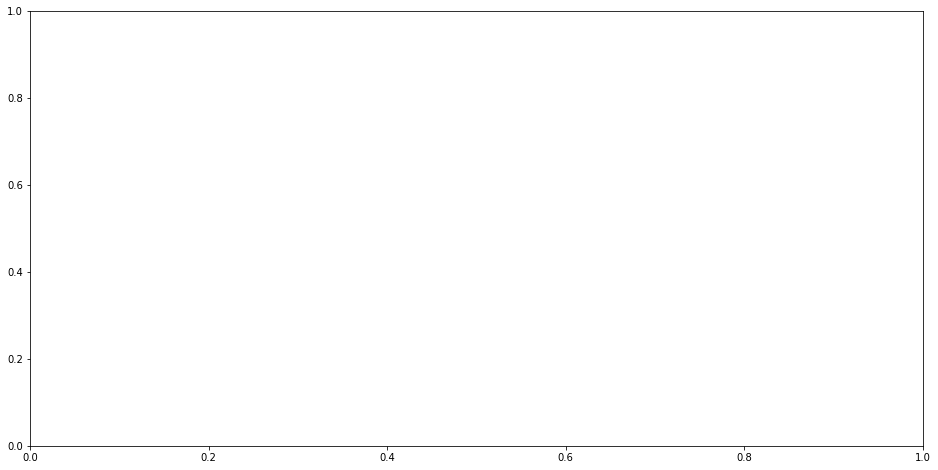

In [15]:
fig,ax = plt.subplots()
fig.set_size_inches((16,8))
# make a plot
ax.plot(log_post_and_gme.index, log_post_and_gme.id, color="red")
# set x-axis label
ax.set_xlabel("Time",fontsize=14)
# set y-axis label
ax.set_ylabel("WSB Post",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(post_and_gme.index, post_and_gme["Adj Close"],color="blue")
ax2.set_ylabel("GME Price",color="blue",fontsize=14)

plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


In [16]:
abs_lpag = abs(log_post_and_gme.pct_change())
abs_pag = abs(post_and_gme.pct_change())

NameError: name 'log_post_and_gme' is not defined

NameError: name 'abs_lpag' is not defined

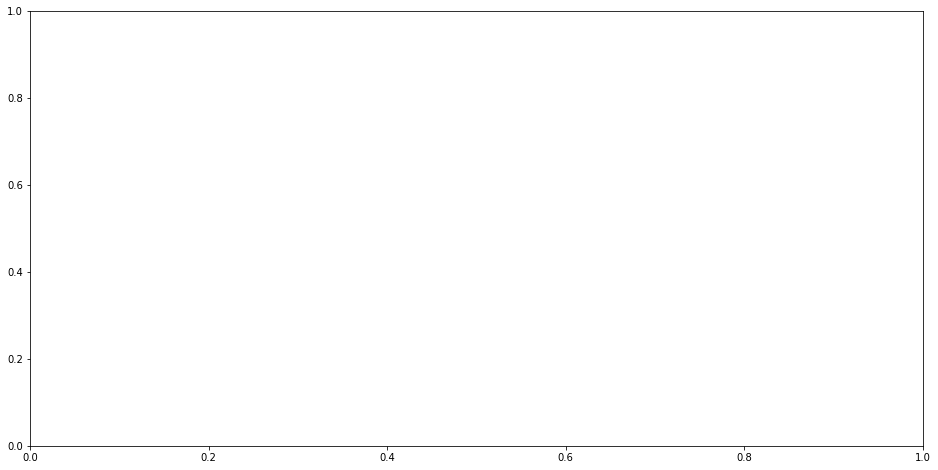

In [17]:
fig,ax = plt.subplots()
fig.set_size_inches((16,8))
# make a plot
ax.plot(abs_lpag.index, abs_lpag.id, color="red")
# set x-axis label
ax.set_xlabel("Time",fontsize=14)
# set y-axis label
ax.set_ylabel("WSB Post",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(abs_pag.index, abs_pag["Adj Close"],color="blue")
ax2.set_ylabel("GME Price",color="blue",fontsize=14)

plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


In [18]:
plt.scatter(log_post_and_gme["Adj Close"], log_post_and_gme["Post Count"])

NameError: name 'log_post_and_gme' is not defined

AttributeError: 'function' object has no attribute 'index'

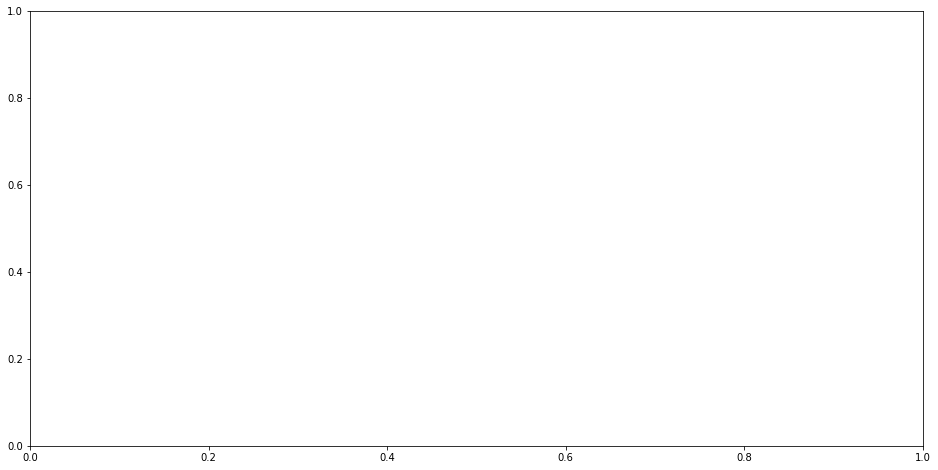

In [11]:
fig,ax = plt.subplots()
fig.set_size_inches((16,8))
# make a plot
ax.plot(post_and_gme.index, post_and_gme.id, color="red")
# set x-axis label
ax.set_xlabel("Time",fontsize=14)
# set y-axis label
ax.set_ylabel("WSB Post",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(post_and_gme.index, post_and_gme["Adj Close"],color="blue")
ax2.set_ylabel("GME Price",color="blue",fontsize=14)

plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')


In [12]:
log_post_and_gme = np.log(post_and_gme)

TypeError: loop of ufunc does not support argument 0 of type method which has no callable log method